In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


ImportError: cannot import name 'metircs' from 'sklearn' (/Users/rakesh/anaconda3/lib/python3.11/site-packages/sklearn/__init__.py)

In [2]:
# Loading the data from a CSV file into a Pandas DataFrame
big_mart_data = pd.read_csv('Train.csv')

# Displaying the first 5 rows of the dataframe
big_mart_data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
# number of data points & number of features
big_mart_data.shape

(8523, 12)

In [18]:
# getting some information about thye dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   int64  
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   int64  
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   int64  
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   int64  
 7   Outlet_Size           8523 non-null   int64  
 8   Outlet_Location_Type  8523 non-null   int64  
 9   Outlet_Type           8523 non-null   int64  
 10  Item_Outlet_Sales     8523 non-null   float64
 11  Outlet_Age            8523 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


In [3]:
# Checking for missing values
big_mart_data.isnull().sum()

# Filling missing values
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)
big_mart_data['Outlet_Size'].fillna(big_mart_data['Outlet_Size'].mode()[0], inplace=True)


In [19]:
# mean value of "Item_Weight" column
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [20]:
# filling the missing values in "Item_weight column" with "Mean" value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)

In [21]:
# mode of "Outlet_Size" column
big_mart_data['Outlet_Size'].mode()

0    1
Name: Outlet_Size, dtype: int64

In [22]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [23]:
print(mode_of_Outlet_size)

Outlet_Type  0  1  2  3
Outlet_Size  1  1  1  1


In [24]:
miss_values = big_mart_data['Outlet_Size'].isnull()  

In [25]:
print(miss_values)

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [26]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Outlet_Age              0
dtype: int64

In [27]:
big_mart_data.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,0.352693,0.066132,7.226681,140.992782,4.722281,1.170832,1.112871,1.201220,2181.288914,25.168133
std,449.222377,4.226124,0.477836,0.051598,4.209990,62.275067,2.837201,0.600327,0.812757,0.796459,1706.499616,8.371760
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,0.000000,0.000000,0.000000,33.290000,14.000000
25%,395.500000,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1.000000,0.000000,1.000000,834.247400,19.000000
50%,783.000000,12.857645,0.000000,0.053931,6.000000,143.012800,5.000000,1.000000,1.000000,1.000000,1794.331000,24.000000
75%,1167.000000,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2.000000,2.000000,1.000000,3101.296400,36.000000
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2.000000,2.000000,3.000000,13086.964800,38.000000


In [ ]:
Categorical Features

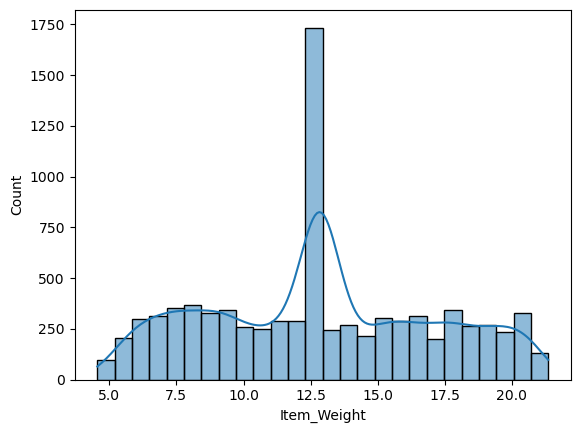

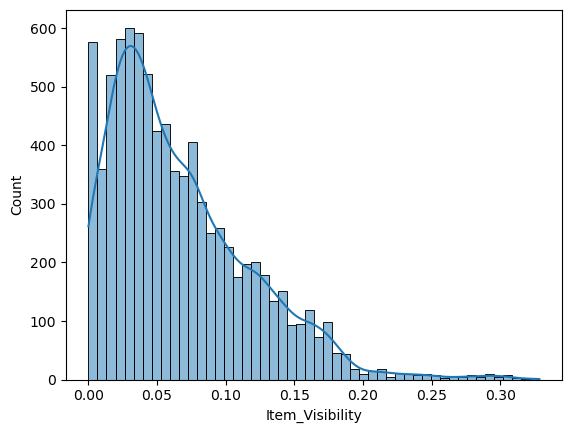

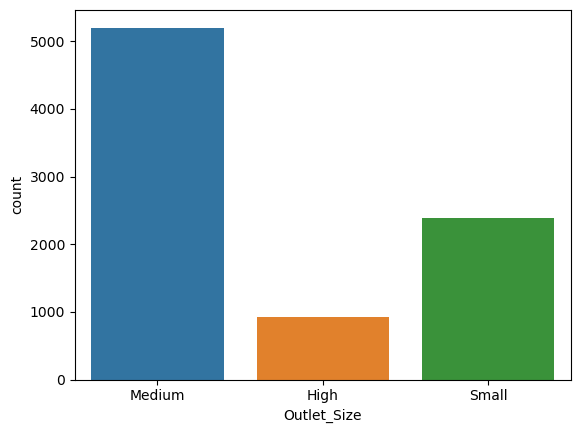

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
# Numerical features analysis
sns.histplot(big_mart_data['Item_Weight'], kde=True)
plt.show()
sns.histplot(big_mart_data['Item_Visibility'], kde=True)
plt.show()

# Categorical features analysis
sns.countplot(x='Outlet_Size', data=big_mart_data)
plt.show()



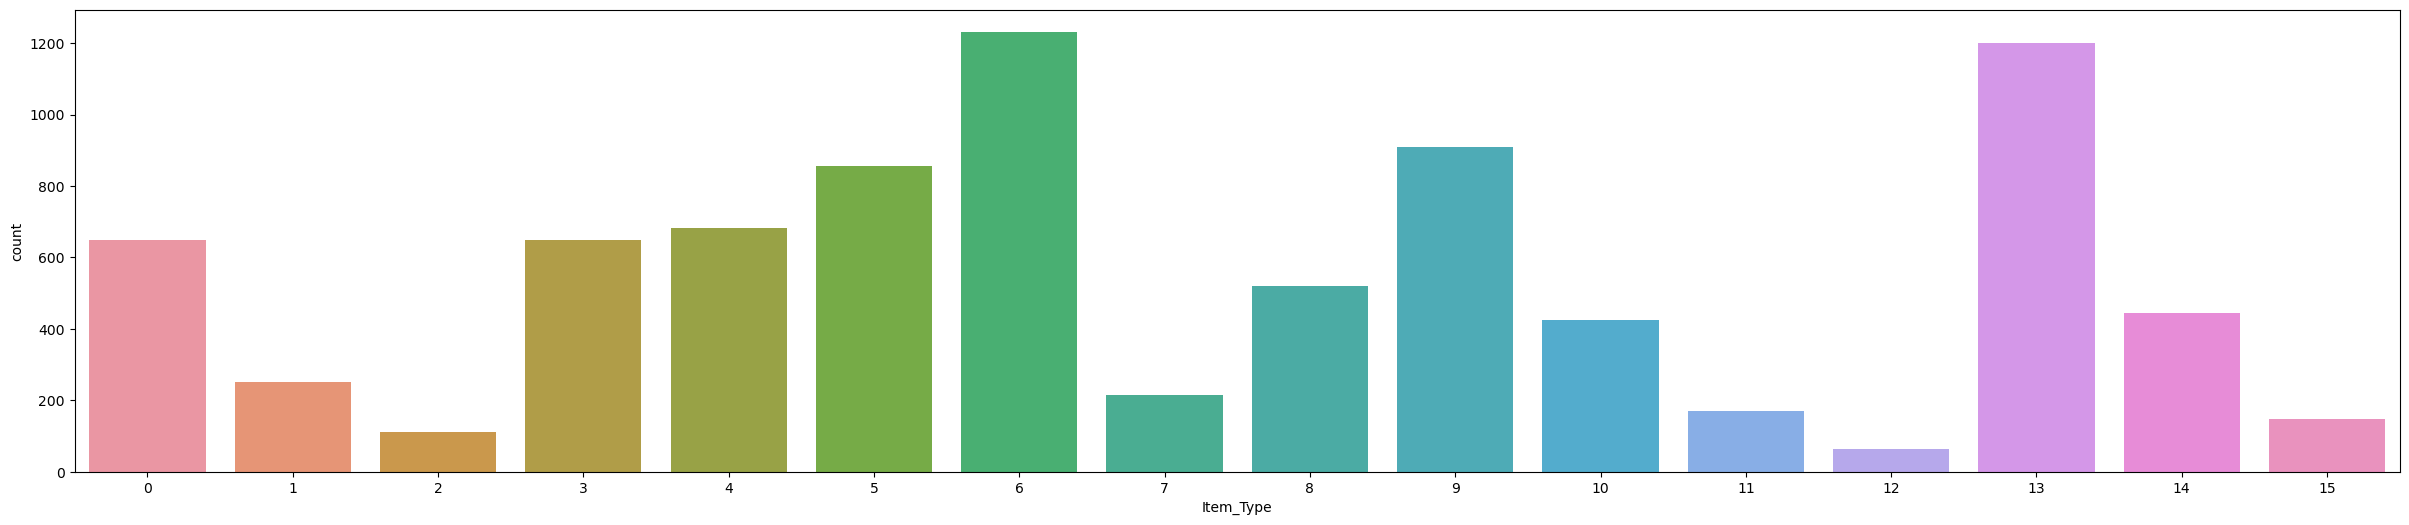

In [29]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.show()

In [ ]:
DATA PREPROCESSING

In [5]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [7]:
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [8]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [9]:
encoder = LabelEncoder()

In [10]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [11]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [12]:
# Feature Engineering - Creating new features or modifying existing ones
big_mart_data['Outlet_Age'] = 2023 - big_mart_data['Outlet_Establishment_Year']
big_mart_data.drop('Outlet_Establishment_Year', axis=1, inplace=True)


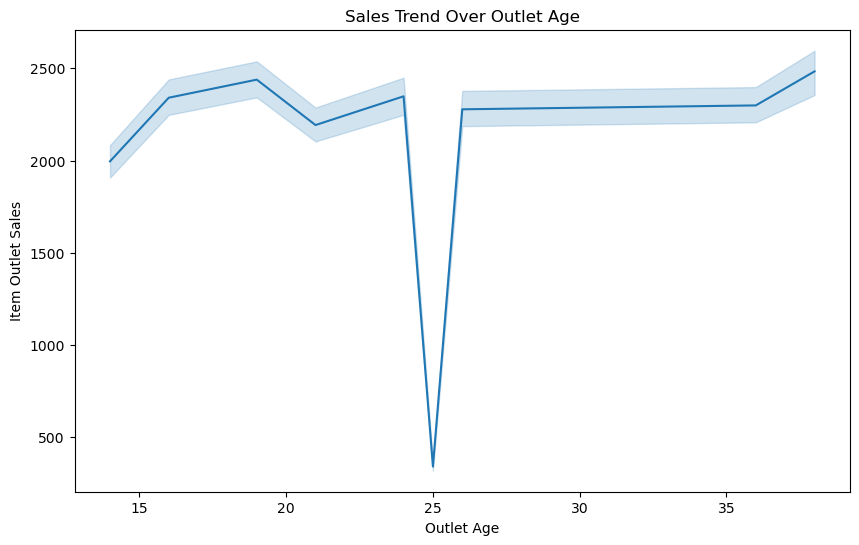

In [13]:
# Time Series Analysis (using Outlet_Age for example)
plt.figure(figsize=(10, 6))
sns.lineplot(data=big_mart_data, x='Outlet_Age', y='Item_Outlet_Sales')
plt.title('Sales Trend Over Outlet Age')
plt.xlabel('Outlet Age')
plt.ylabel('Item Outlet Sales')
plt.show()


In [ ]:
Splitting Features and target

In [14]:
# Preparing data for modeling
X = big_mart_data.drop('Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [30]:
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [31]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Size  \
0             4  249.8092                  9            1   
1

In [32]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [ ]:
Splitting the data into Training data & Testing Data

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [ ]:
Machine Learning Model Training

In [15]:
regressor = RandomForestRegressor()
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [16]:
# Making predictions and evaluating the model
predictions = regressor.predict(X_test)
print(f'R2 Score: {r2_score(Y_test, predictions)}')

R2 Score: 0.551926576331744
